# Regret Histogram
This notebook displays: Regret histograms for CIFAR10 and MNIST.

Results appear on figure 3a and figure 2b.

In [3]:
import os
print(os.getcwd()) #print working dir
import matplotlib
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from matplotlib import gridspec
import time

from importlib import reload
os.sys.path.insert(0, '../src/')
import analyze_utilities
reload(analyze_utilities)

%run ./result_summary.ipynb

output_path = '../results/figures'
is_plot_title = False
is_save_fig = True

# print(plt.style.available)
# print(plt.rcParams)
plt.style.use(['seaborn-darkgrid', 'seaborn-paper'])
label_size = 18
tick_size = 14
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('axes', titlesize=label_size)
plt.rc('axes', labelsize=label_size)
plt.rc('xtick', labelsize=tick_size)
plt.rc('ytick', labelsize=tick_size)

C:\Users\uria\vmplayer_shared\Pnml_code\deep_pnml\notebooks
Loading paths from result_summary.ipynb


## Regret histograms

### MNIST

In [21]:
# 10000 natural samples for lambda=0.03
mnist_pgd_natural_fgsm_lambda03 = ['./../results/paper/MNIST/regret_hist_fig_3a/mnist_lambda_003_bpda/results_mnist_adversarial_20190924_213329.json']
# 3000 adversarial BPDA samples with for lambda=0.03
mnist_lambda_003_bpda = ['./../results/paper/MNIST/regret_hist_fig_3a/no_attack/results_mnist_adversarial_20190924_212847.json']

results_df_natural, statistic_natural = analyze_utilities.load_results_to_df(\
                                             mnist_pgd_natural_fgsm_lambda03, idx=range(0,3000))
print('Natural: loaded %d keys' % results_df_natural.shape[0])
results_df_adaptive, statistic_adaptive = analyze_utilities.load_results_to_df(mnist_lambda_003_bpda)
print('Adaptive: loaded %d keys' % results_df_adaptive.shape[0])

Natural: loaded 3000 keys
Adaptive: loaded 10000 keys


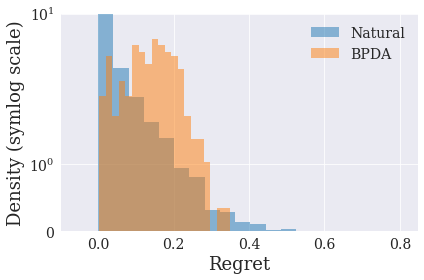

Mean: Natural, adaptive: [0.08252285217793172, 0.012317861314106962]
Mean: Natural, adaptive of incorrect only: [0.14368139640636482, 0.14199813066347328]


In [22]:
# Plot
bins = 20
plt.hist(results_df_natural['log_norm_factor'][results_df_natural['nml_is_correct'] == True], alpha=0.5, density=True, label='Natural', bins=bins)
plt.hist(results_df_adaptive['log_norm_factor'][results_df_adaptive['nml_is_correct'] == False], alpha=0.5, density=True, label='BPDA', bins=bins)
plt.ylabel('Density (symlog scale)')
plt.xlabel('Regret')
plt.xlim(left=-0.1)
plt.ylim(top=10)
plt.yscale('symlog')
plt.title('Regret Histogram of natural and adversarial MNIST') if is_plot_title else None
plt.legend(fontsize=14)
plt.savefig(os.path.join(output_path, 'fig_regret_hist.pdf'),
            dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()
print('Mean: Natural, adaptive: {}'.format([results_df_natural['log_norm_factor'].mean(),
                                             results_df_adaptive['log_norm_factor'].mean()]))

print('Mean: Natural, adaptive of incorrect only: {}'.format([results_df_natural['log_norm_factor'][results_df_natural['nml_is_correct'] == False].mean(),
                                             results_df_adaptive['log_norm_factor'][results_df_adaptive['nml_is_correct'] == False].mean()]))


### CIFAR

In [23]:
# Load CIFAR
# refinement : fgsm eps=0.04 - This results are appear in the paper as CIFAR regret histogram
cifar_pgd_natural_fgsm_all5 = ['./../results/paper/CIFAR/regret_hist_fig_2b/natural_lambda_004/results_cifar_adversarial_20190826_073604.json']  # [Original\PNML Accuracy] = [] 
cifar_pgd_pgd_fgsm_all5 = ['./../results/paper/CIFAR/regret_hist_fig_2b/pgd_lambda_004/results_cifar_adversarial_20190825_230704.json']  # [Original\PNML Accuracy] = []

results_df_natural, statistic_natural = analyze_utilities.load_results_to_df(cifar_pgd_natural_fgsm_all5) #cifar_pgd_natural_fgsm_all #cifar_pgd_natural_fgsm1
print('Natural: loaded %d keys' % results_df_natural.shape[0])
results_df_pgd, statistic_pgd = analyze_utilities.load_results_to_df(cifar_pgd_pgd_fgsm_all5)
print('PGD: loaded %d keys' % results_df_pgd.shape[0])

Natural: loaded 10000 keys
PGD: loaded 10000 keys


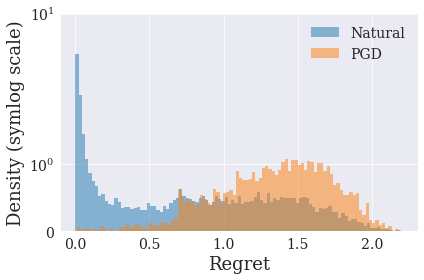

Mean: Natural, adaptive: [0.8911116084846537, 0.012317861314106962]
Mean: Natural, adaptive of incorrect only: [1.5084615079495234, 0.14199813066347328]


In [24]:
# Plot
bins = 100
plt.hist(results_df_natural['log_norm_factor'][results_df_natural['nml_is_correct'] == True], alpha=0.5, density=True, label='Natural', bins=bins)
plt.hist(results_df_pgd['log_norm_factor'][results_df_pgd['nml_is_correct'] == False], alpha=0.5, density=True, label='PGD', bins=bins)
plt.ylabel('Density (symlog scale)')
plt.xlabel('Regret')
plt.xlim(left=-0.1)
plt.ylim(top=10)
plt.yscale('symlog')
plt.title('Regret Histogram of natural and adversarial MNIST') if is_plot_title else None
plt.legend(fontsize=14)
plt.savefig(os.path.join(output_path, 'fig_regret_hist.pdf'),
            dpi=200, bbox_inches=plt.tight_layout()) if is_save_fig else None
plt.show()
print('Mean: Natural, adaptive: {}'.format([results_df_natural['log_norm_factor'].mean(),
                                             results_df_adaptive['log_norm_factor'].mean()]))

print('Mean: Natural, adaptive of incorrect only: {}'.format([results_df_natural['log_norm_factor'][results_df_natural['nml_is_correct'] == False].mean(),
                                             results_df_adaptive['log_norm_factor'][results_df_adaptive['nml_is_correct'] == False].mean()]))